# Ridgeline plot

## Preparation


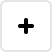
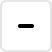
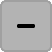
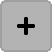
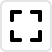
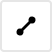
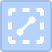
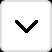
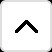
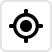

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

In [2]:
iris_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv")
print(iris_df.shape)
iris_df.head()

(150, 5)


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
mpg_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
print(mpg_df.shape)
mpg_df.head()

(234, 12)


Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   
3           4         audi    a4    2.0  2008    4    auto(av)   f   21   30   
4           5         audi    a4    2.8  1999    6    auto(l5)   f   16   26   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact  
3  p  compact  
4  p  compact

## Plots

### Default plot

In [4]:
ggplot(iris_df, aes("sepal_length", "species")) + \
    geom_area_ridges()

### `min_height` parameter

In [5]:
df = pd.DataFrame({
    "x": [1, 2, 3, 4, 5, 6, 7],
    "y": [0, 0, 0, 0, 0, 0, 0],
    "h": [.4, -.2, .6, -.5, .3, .1, .7],
})

In [6]:
ggplot(df) + \
    geom_area_ridges(aes("x", "y", height="h"), stat='identity', color="black", fill="#3182bd", min_height=-.4)

### `trim` and `extend_scale` parameters

In [7]:
width, height = 400, 300
bunch = GGBunch()
bunch.add_plot(ggplot(iris_df, aes("sepal_length", "species")) + \
    geom_area_ridges(trim=False, extend_scale=None) + \
    ggtitle("Default: trim=False, extend_scale=None"),
    0, 0, width, height)
bunch.add_plot(ggplot(iris_df, aes("sepal_length", "species")) + \
    geom_area_ridges(trim=False, extend_scale=0) + \
    ggtitle("trim=False, extend_scale=0"),
    width, 0, width, height)
bunch.add_plot(ggplot(iris_df, aes("sepal_length", "species")) + \
    geom_area_ridges(trim=False, extend_scale=3) + \
    ggtitle("trim=False, extend_scale=3"),
    0, height, width, height)
bunch.add_plot(ggplot(iris_df, aes("sepal_length", "species")) + \
    geom_area_ridges(trim=True) + \
    ggtitle("trim=True"),
    width, height, width, height)
bunch.show()

### `scale` parameter

In [8]:
ggplot(iris_df, aes("sepal_length", "species")) + \
    geom_area_ridges(scale=1.5)

### Quantiles

In [9]:
quantiles = [.05, .25, .5, .75, .95]
width, height = 400, 300
bunch = GGBunch()
bunch.add_plot(ggplot(iris_df, aes("sepal_length", "species")) + \
    geom_area_ridges(quantiles=quantiles, color='black'),
    0, 0, width, height)
bunch.add_plot(ggplot(iris_df, aes("sepal_length", "species")) + \
    geom_area_ridges(quantiles=quantiles, quantile_lines=True, color='black'),
    width, 0, width, height)
bunch.add_plot(ggplot(iris_df, aes("sepal_length", "species")) + \
    geom_area_ridges(aes(fill="..quantile.."), quantiles=quantiles, color='black', show_legend=False),
    0, height, width, height)
bunch.add_plot(ggplot(iris_df, aes("sepal_length", "species")) + \
    geom_area_ridges(aes(fill="..quantile.."), quantiles=quantiles, quantile_lines=True, color='black', show_legend=False),
    width, height, width, height)
bunch.show()

### Other

In [10]:
ggplot(iris_df, aes("sepal_length", "species")) + \
    geom_area_ridges(kernel="triangular", adjust=.8, quantile_lines=True, trim='all', \
                     color="#993404", fill="#fe9929", tooltips=layer_tooltips().line("height|@..height..")\
                    .format("@..density..", ".2f").line("density|@..density..")\
                    .line("quantile|@..quantile.."))

In [11]:
ggplot(mpg_df, aes("hwy", as_discrete("year"), fill="drv")) + \
    geom_area_ridges(color="white", alpha=.5) + \
    scale_fill_brewer(type='qual', palette='Set1') + \
    facet_grid(x="drv") + \
    theme_bw() + flavor_darcula()